Regresión múltiple para mediciones antropométricas de adultos entre 19 y 59 años de edad

a) Estudiar la correlación entre edad, peso, talla,cintura, sistol3, diastol3.
b) ¿En cuáles hay una relación más fuerte?
c) Ajustar un modelo de regresión múltiple para tratar de explicar el peso y aplicar selección automática de variables, para dejar la variables relevantes.
---



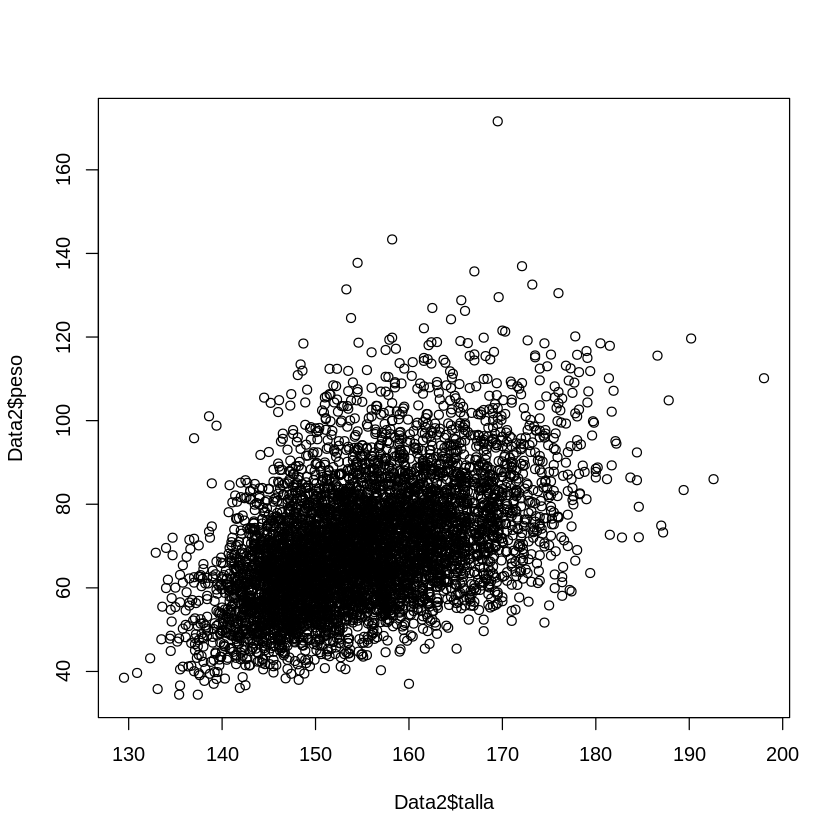

,edad,peso,talla,cintura,sistol3,diastol3
edad,1.00000000,-0.0909707,-0.1854789,0.09294435,0.2865616,0.0244814
peso,-0.09097070,1.0000000,0.6064114,0.88279335,0.1875790,0.2862656
talla,-0.18547891,0.6064114,1.0000000,0.31778014,0.1247516,0.1131896
cintura,0.09294435,0.8827933,0.3177801,1.00000000,0.1421538,0.2805319
sistol3,0.28656156,0.1875790,0.1247516,0.14215376,1.0000000,0.6602295
diastol3,0.02448140,0.2862656,0.1131896,0.28053190,0.6602295,1.0000000


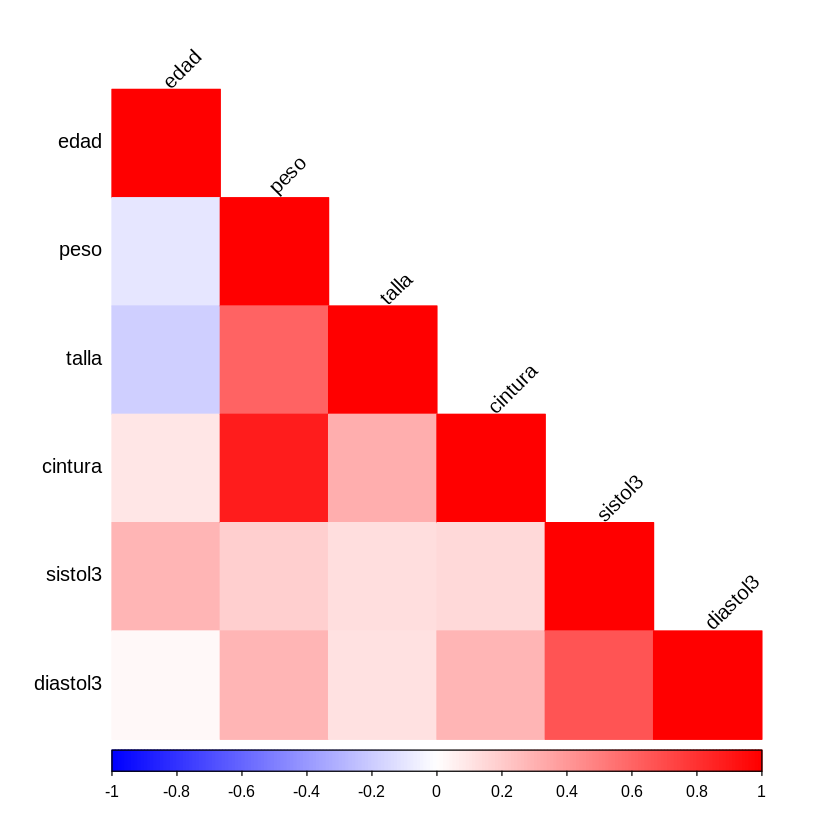

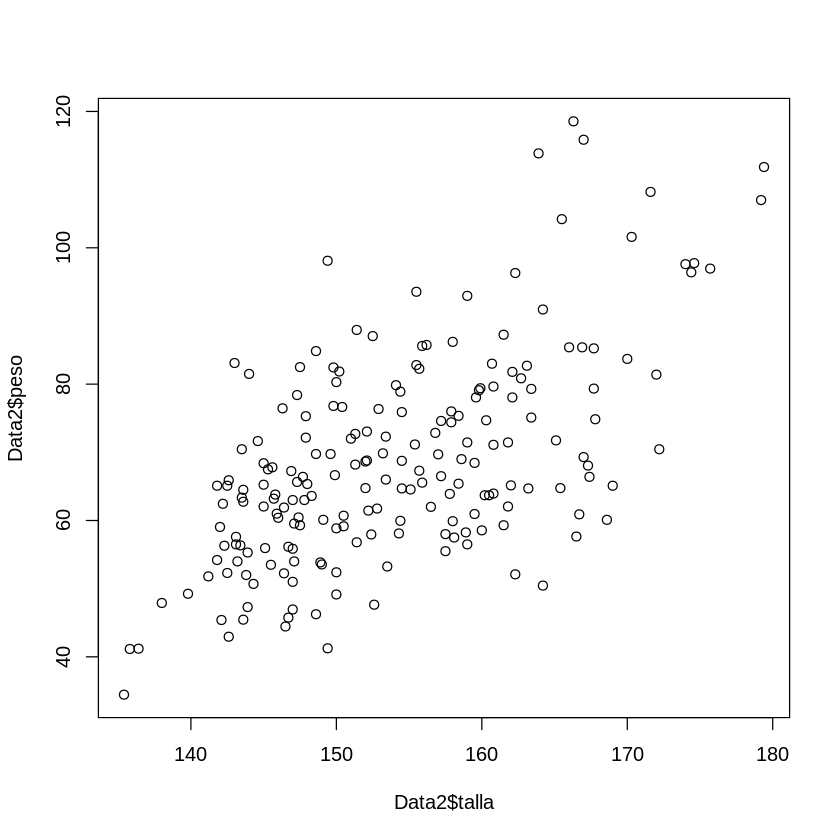

In [7]:
library(readxl)
# Instalar si no lo tienes
#install.packages("corrplot")
library(corrplot)

Data1 <- read_excel("EnsanutMediciones.xls")

Data2<-subset (Data1, Data1$edad>=25 & Data1$edad<=65 & Data1$talla != 222.2  &
               Data1$peso != 222.22 & Data1$cintura != 222.22 & Data1$sistol3 != 222.22 & Data1$diastol3 != 222.22
               & Data1$cintura != 222.22
               & Data1$talla > 120,
               select = c(sexo,edad,peso, talla,cintura, sistol3, diastol3))
plot(Data2$talla, Data2$peso)
#Una mustra de 200
set.seed(1)
Data2 <- Data2[sample(nrow(Data2), 200), ]

#Se convierte a variable categórica sexo, para que sea tomada como variable dummy
Data2$sexo <- as.factor(Data2$sexo)
# Seleccionar únicamente las columnas numéricas
Data2_num <- Data2[sapply(Data2, is.numeric)]

# Calcular la matriz de correlación
M <- cor(Data2_num)

# Mostrar solo la parte inferior, coloreada por intensidad
corrplot(M, method = "color", type = "lower",
         tl.col = "black", tl.srt = 45, # etiquetas en negro y rotadas
         col = colorRampPalette(c("blue", "white", "red"))(200))
cor(Data2_num)
plot(Data2$talla, Data2$peso)




Interpretar este primer análisis descriptivo, porque fue necesario tomar una muestra? qué le dice la matriz de correlación?



Call:
lm(formula = Data2$peso ~ Data2$talla + Data2$cintura + Data2$edad + 
    Data2$sistol3 + Data2$diastol3 + Data2$sexo)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.1298  -2.9568  -0.2166   2.7126  15.0881 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -106.01805    8.11279 -13.068  < 2e-16 ***
Data2$talla       0.54616    0.05120  10.667  < 2e-16 ***
Data2$cintura     0.96650    0.03045  31.738  < 2e-16 ***
Data2$edad       -0.18069    0.03408  -5.301 3.13e-07 ***
Data2$sistol3     0.07523    0.02584   2.912  0.00402 ** 
Data2$diastol3   -0.03910    0.04298  -0.910  0.36407    
Data2$sexo2       0.14545    0.88600   0.164  0.86977    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.587 on 193 degrees of freedom
Multiple R-squared:  0.9119,	Adjusted R-squared:  0.9092 
F-statistic: 333.1 on 6 and 193 DF,  p-value: < 2.2e-16


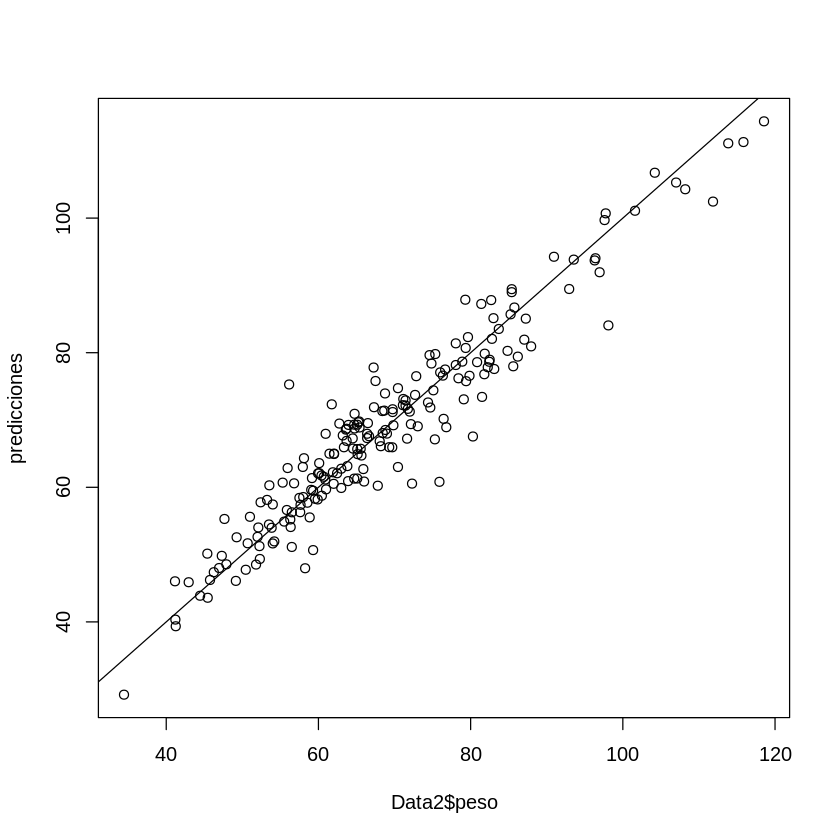

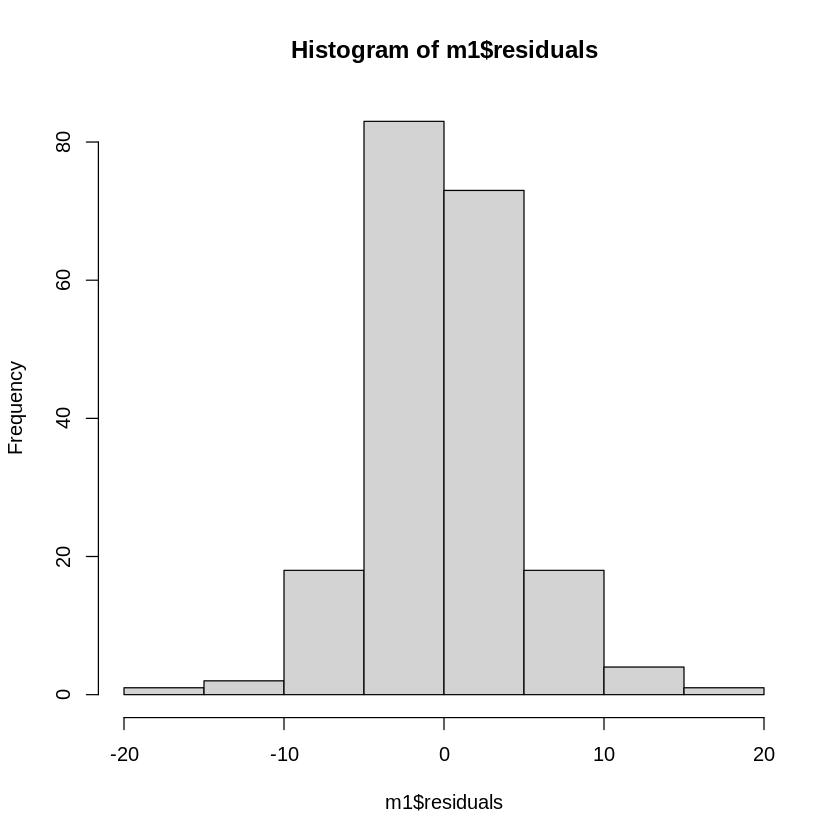

In [8]:
#Modelo completo con todas las posibles variables relacionadas con el peso
m1<-lm(Data2$peso ~ Data2$talla + Data2$cintura + Data2$edad + Data2$sistol3 + Data2$diastol3 + Data2$sexo)
summary(m1)

predicciones <- predict(m1, newdata = Data2)
plot(Data2$peso,predicciones)
abline(0,1)
hist(m1$residuals)

DAKLJFSKJGFLKJGAG

#Qué se observa de destacado al ajustar:
Interpretar el modelo, su calidad de ajuste y lo que observa con los residuales

28 48 50 
28 48 50


Call:
lm(formula = Data2b$peso ~ Data2b$talla + Data2b$cintura + Data2b$edad + 
    Data2b$sistol3 + Data2b$diastol3 + Data2b$sexo)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7761  -2.9074  -0.1585   2.7476  13.0531 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -100.90965    7.39827 -13.640  < 2e-16 ***
Data2b$talla       0.52225    0.04669  11.185  < 2e-16 ***
Data2b$cintura     0.98059    0.02793  35.108  < 2e-16 ***
Data2b$edad       -0.19370    0.03127  -6.194 3.56e-09 ***
Data2b$sistol3     0.06536    0.02334   2.800  0.00564 ** 
Data2b$diastol3   -0.04967    0.03886  -1.278  0.20277    
Data2b$sexo2      -0.27673    0.80442  -0.344  0.73122    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.134 on 190 degrees of freedom
Multiple R-squared:  0.9279,	Adjusted R-squared:  0.9256 
F-statistic: 407.5 on 6 and 190 DF,  p-value: < 2.2e-16


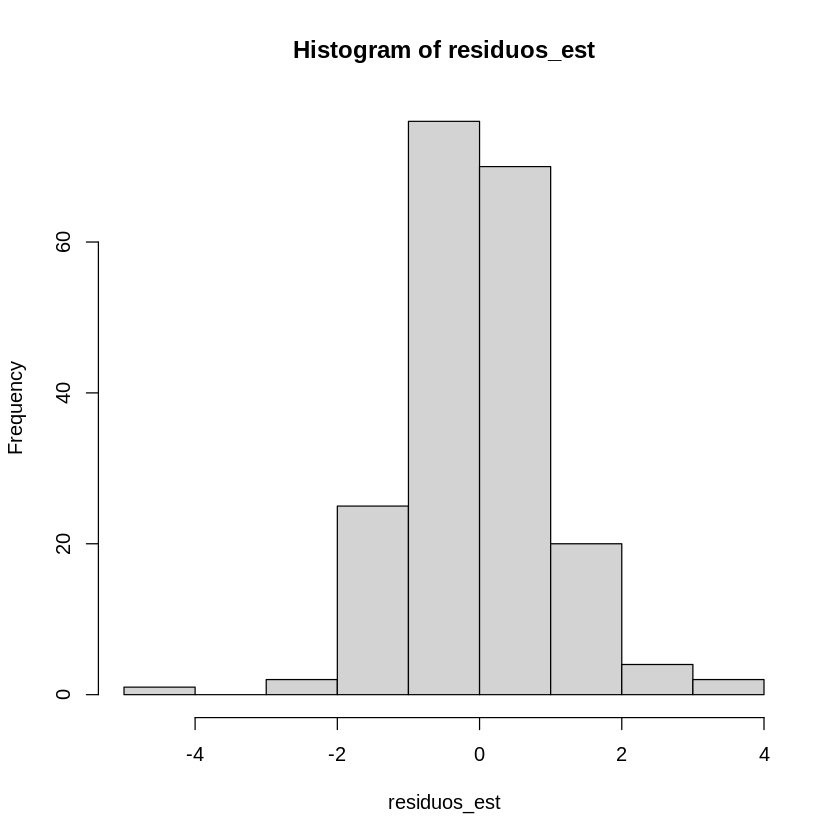

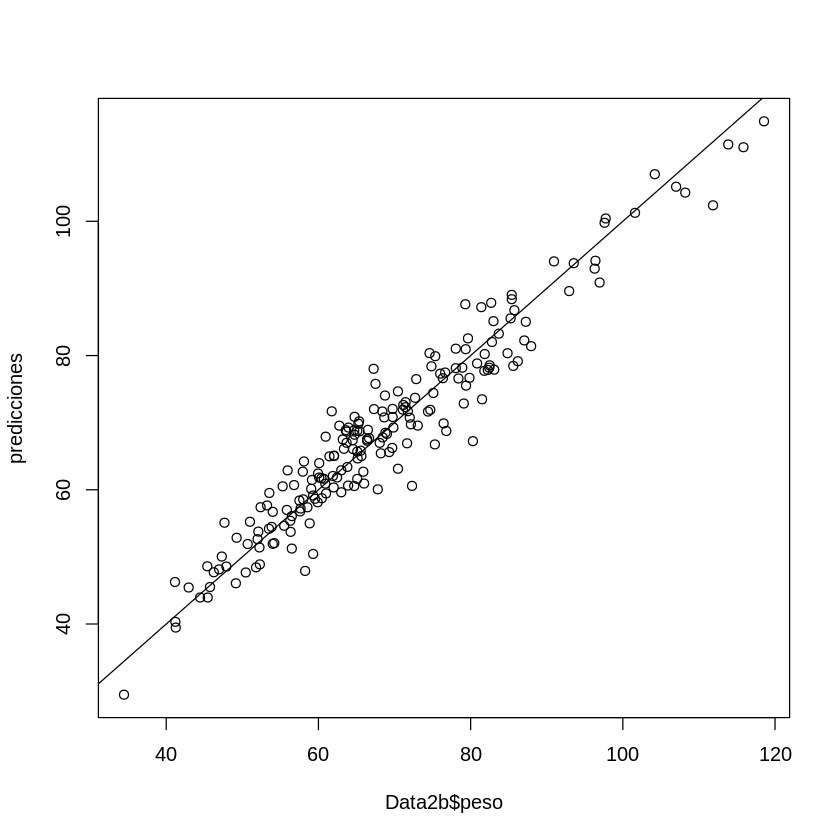

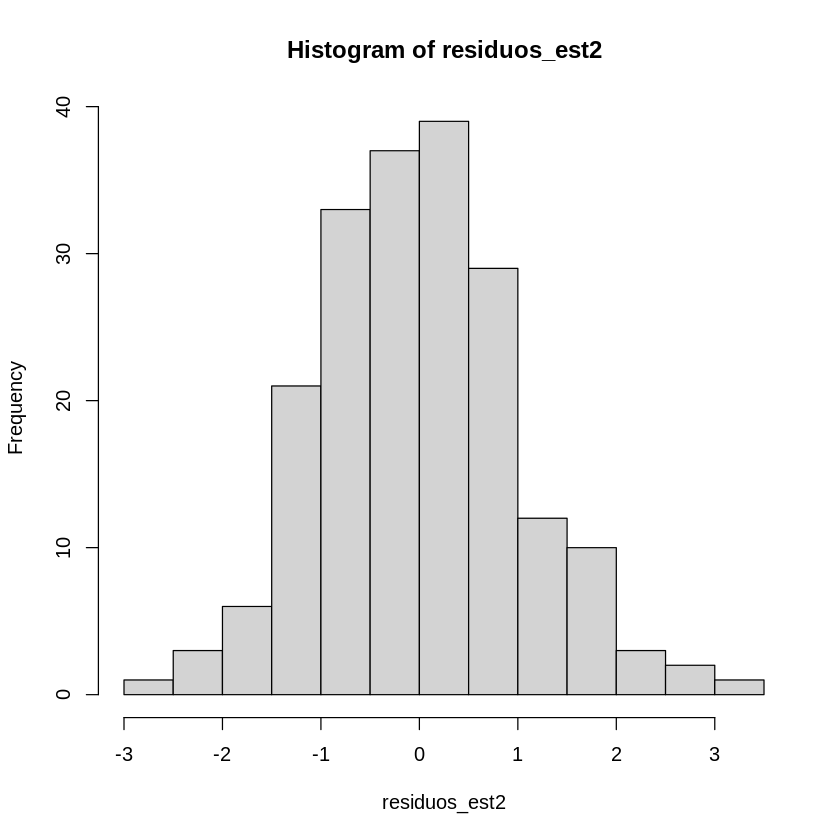

In [9]:
#Eliminar residuales atípicos, para ello se estandarizan
residuos_est <- rstandard(m1)
hist(residuos_est)
outliers <- which(abs(residuos_est) > 3.0)
outliers
Data2b<-Data2[-outliers,]

#Modelo completo ajustado a los datos sin outliers
m2<-lm(Data2b$peso ~ Data2b$talla + Data2b$cintura + Data2b$edad + Data2b$sistol3 + Data2b$diastol3 + Data2b$sexo)

predicciones <- predict(m2, newdata = Data2b)
summary(m2)
plot(Data2b$peso,predicciones)
abline(0,1)
residuos_est2 <- rstandard(m2)
hist(residuos_est2)


#Interpretar lo que ha pasado:
Cuántos outliers había, qué ha pasado con la calidad del ajuste.

Start:  AIC=1072.1
Data2b$peso ~ 1

                  Df Sum of Sq   RSS     AIC
+ Data2b$cintura   1     35796  9239  762.04
+ Data2b$talla     1     17120 27915  979.88
+ Data2b$diastol3  1      3481 41553 1058.25
+ Data2b$sexo      1      2460 42575 1063.04
+ Data2b$sistol3   1      1416 43619 1067.81
<none>                         45035 1072.10
+ Data2b$edad      1       368 44667 1072.49

Step:  AIC=762.04
Data2b$peso ~ Data2b$cintura

                  Df Sum of Sq    RSS    AIC
+ Data2b$talla     1    5311.7 3926.8 595.50
+ Data2b$sexo      1    2014.1 7224.4 715.60
+ Data2b$edad      1    1611.5 7627.0 726.28
<none>                         9238.5 762.04
+ Data2b$sistol3   1      92.5 9146.0 762.06
+ Data2b$diastol3  1      33.1 9205.4 763.34

Step:  AIC=595.5
Data2b$peso ~ Data2b$cintura + Data2b$talla

                  Df Sum of Sq    RSS    AIC
+ Data2b$edad      1    528.11 3398.7 569.05
<none>                         3926.8 595.50
+ Data2b$diastol3  1     14.92 3911.9 596.


Call:
lm(formula = Data2b$peso ~ Data2b$cintura + Data2b$talla + Data2b$edad + 
    Data2b$sistol3, data = Data2b)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4945  -2.8296  -0.1216   2.5379  13.5260 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -104.06791    5.47527 -19.007  < 2e-16 ***
Data2b$cintura    0.96801    0.02572  37.635  < 2e-16 ***
Data2b$talla      0.53772    0.03554  15.128  < 2e-16 ***
Data2b$edad      -0.18126    0.02969  -6.104  5.6e-09 ***
Data2b$sistol3    0.04562    0.01707   2.672   0.0082 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.131 on 192 degrees of freedom
Multiple R-squared:  0.9272,	Adjusted R-squared:  0.9257 
F-statistic: 611.7 on 4 and 192 DF,  p-value: < 2.2e-16


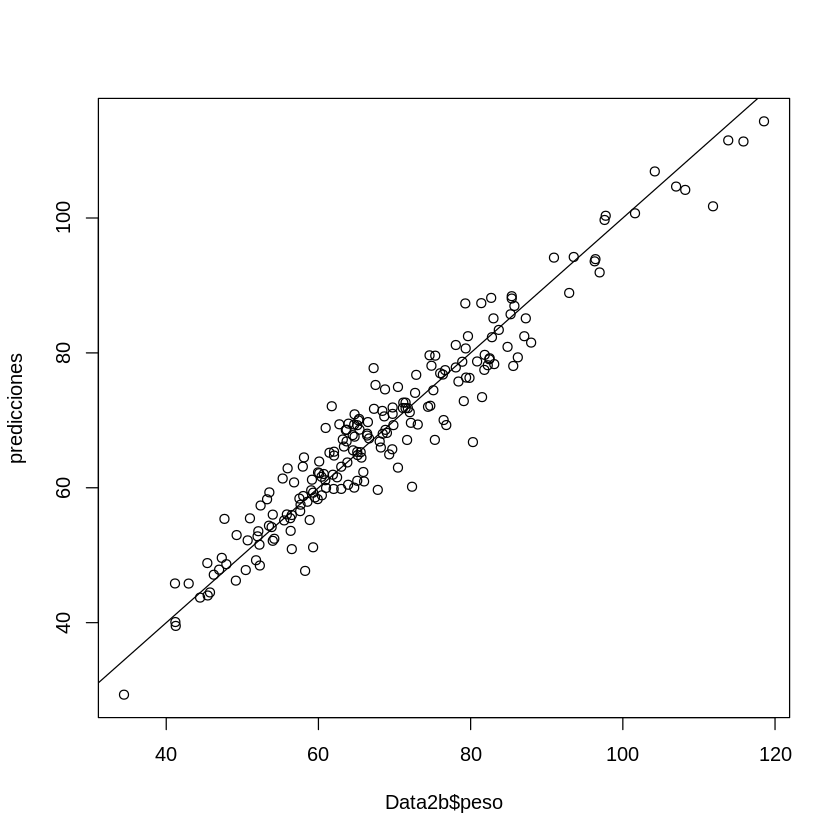

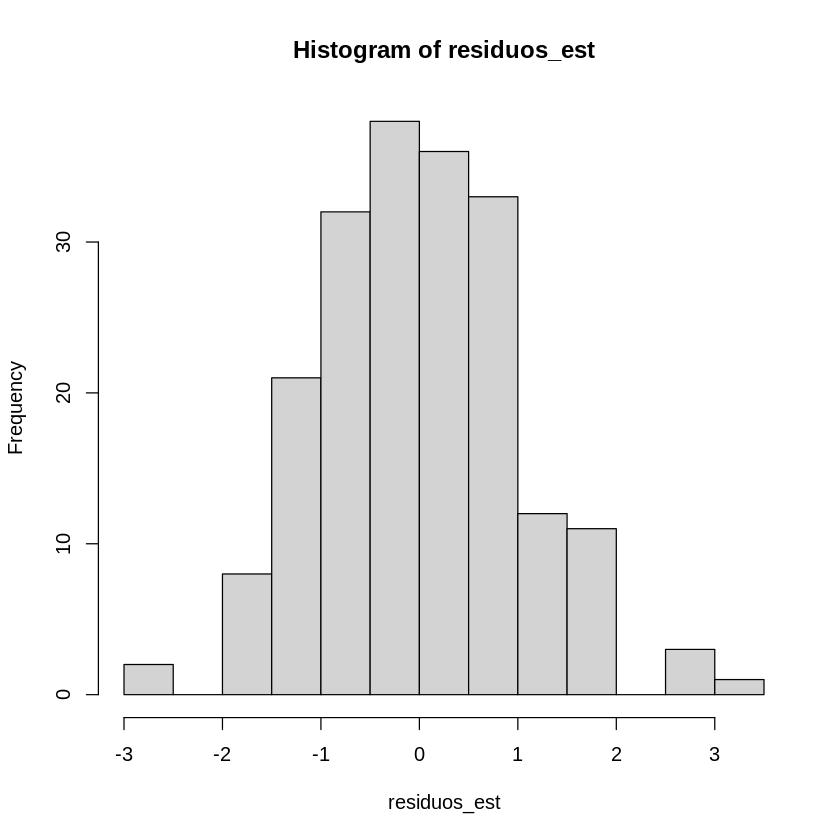

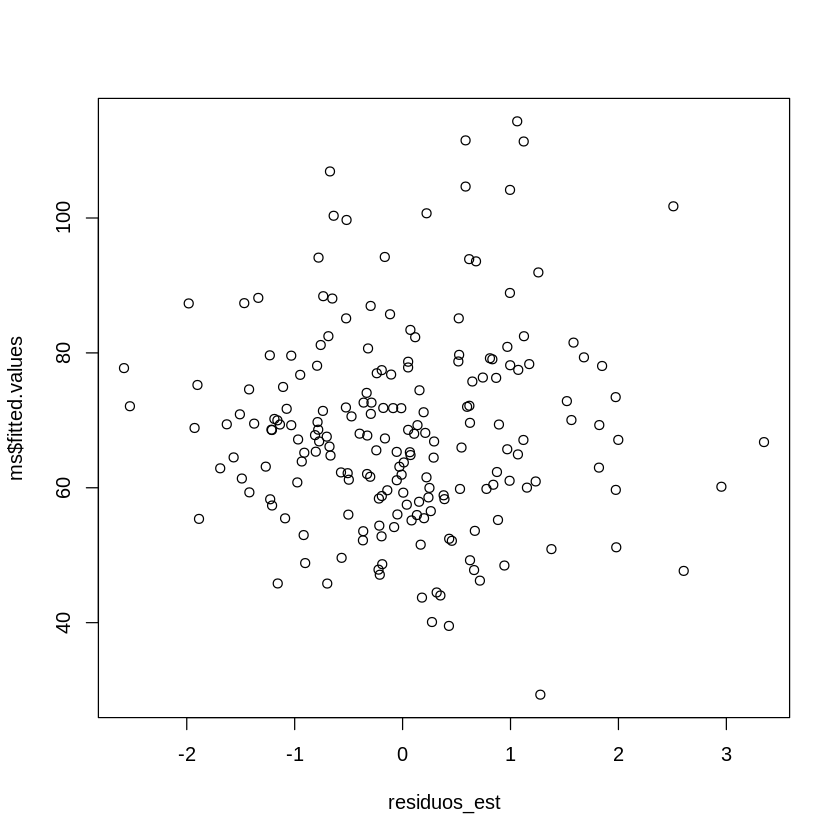

In [10]:
#Depuración del modelo completo, para solo dejar términos significativos

# Ajustar el modelo nulo (sin predictores)
mn <- lm(Data2b$peso ~ 1, data = Data2b)
# Realizar la selección forward
ms <- step(mn, scope = list(lower = mn, upper = m2), direction = "forward")

# Mostrar el resultado del modelo final seleccionado
summary(ms)

predicciones <- predict(ms, newdata = Data2b)
plot(Data2b$peso,predicciones)
abline(0,1)
residuos_est <- rstandard(ms)
hist(residuos_est)
plot(residuos_est,ms$fitted.values)



Interpretar Qué ha pasado con la depuración del modelo, en qué orden entraron las variables, cuáles se eliminaron, cuál es la calidad final del modelo